## Exploratory Analysis

In this code file, we visualise the data using different methods (Charts, heatmaps, graphs, etc.). Additionally we shall execute some data modifications to combine different datasets, explore a certain characteristic to obtain meaningful results. 

##### Exporting the data

In [1]:
#!pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

from datetime import datetime
from random import randint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import geopandas as gpd

In [4]:
url1 = 'https://www.opendata.nhs.scot/dataset/0d57311a-db66-4eaa-bd6d-cc622b6cbdfa/resource/a5f7ca94-c810-41b5-a7c9-25c18d43e5a4/download/weekly_ae_activity_20240714.csv'
df_week_AE = pd.read_csv(url1)

url2 = 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/022c3b27-6a58-48dc-8038-8f1f93bb0e78/download/opendata_monthly_ae_when_202405.csv'
df_month_AE = pd.read_csv(url2)

url3 = 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/c4622324-f59c-4011-a67b-83b59c59ca94/download/opendata_monthly_ae_discharge_202405.csv'
df_discharge = pd.read_csv(url3)

In [3]:
url4= 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/37ba17b1-c323-492c-87d5-e986aae9ab59/download/monthly_ae_activity_202405.csv'
df_month_attendances= pd.read_csv(url4)

In [ ]:
# Convert the 'Month' column to string
df_month_attendances['Month'] = df_month_attendances['Month'].astype(str)

# Convert to datetime, specifying the format
df_month_attendances['Month'] = pd.to_datetime(df_month_attendances['Month'], format='%Y%m')

df_month_attendances.head()

,Month,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesAll,NumberWithin4HoursAll,NumberOver4HoursAll,PercentageWithin4HoursAll,NumberOfAttendancesEpisode,...,PercentageWithin4HoursEpisode,PercentageWithin4HoursEpisodeQF,NumberOver8HoursEpisode,NumberOver8HoursEpisodeQF,PercentageOver8HoursEpisode,PercentageOver8HoursEpisodeQF,NumberOver12HoursEpisode,NumberOver12HoursEpisodeQF,PercentageOver12HoursEpisode,PercentageOver12HoursEpisodeQF
0,2007-07-01,S92000003,S08000015,A101H,Minor Injury Unit or Other,252,252,0,100.0,NaN,...,NaN,z,NaN,z,NaN,z,NaN,z,NaN,z
1,2007-07-01,S92000003,S08000015,A111H,Emergency Department,5414,5290,124,97.7,5414.0,...,97.7,NaN,26.0,NaN,0.5,NaN,24.0,NaN,0.4,NaN
2,2007-07-01,S92000003,S08000015,A207H,Minor Injury Unit or Other,92,92,0,100.0,NaN,...,NaN,z,NaN,z,NaN,z,NaN,z,NaN,z
3,2007-07-01,S92000003,S08000015,A210H,Emergency Department,3530,3355,175,95.0,3530.0,...,95.0,NaN,3.0,NaN,0.1,NaN,1.0,NaN,0.0,NaN
4,2007-07-01,S92000003,S08000016,B103H,Minor Injury Unit or Other,20,20,0,100.0,NaN,...,NaN,z,NaN,z,NaN,z,NaN,z,NaN,z


The month statistics data has information about the Day, Hours and Number of attendances information. This can be useful in answering the following aspects of the nature of the A&E demand-

- How does demand change with each day?
- Do Specific hours of the day have higher demand?

<Axes: xlabel='Day', ylabel='NumberOfAttendances'>

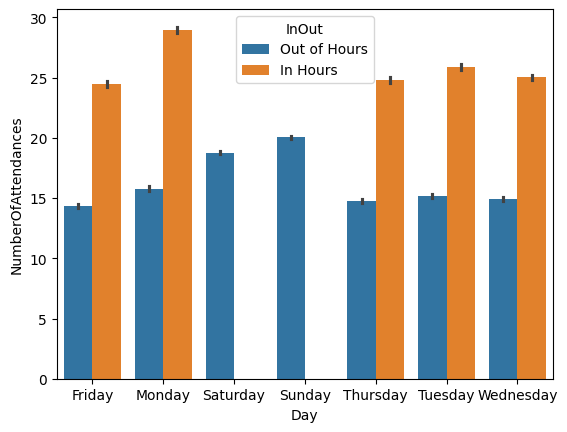

In [5]:
sns.barplot(df_month_AE,x="Day",y="NumberOfAttendances", hue="InOut")

#### Time Series Analysis:

Trend Analysis: Plot the number of attendances over time to observe trends, seasonality, and any anomalies.

Weekly vs Monthly Trends: Compare weekly and monthly trends to identify patterns and differences.

In [6]:
#df_week_AE['WeekEndingDate'].unique()

# Convert the 'WeekEndingDate' column to string
df_week_AE['WeekEndingDate'] = df_week_AE['WeekEndingDate'].astype(str)

# Convert the string to datetime, specifying the format
df_week_AE['WeekEndingDate'] = pd.to_datetime(df_week_AE['WeekEndingDate'], format='%Y%m%d')

df_week_AE.head()

,WeekEndingDate,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesEpisode,NumberWithin4HoursEpisode,NumberOver4HoursEpisode,PercentageWithin4HoursEpisode,NumberOver8HoursEpisode,PercentageOver8HoursEpisode,NumberOver12HoursEpisode,PercentageOver12HoursEpisode
0,2015-02-22,S92000003,S08000015,A210H,Emergency Department,814,624,190,76.7,21,2.6,2,0.2
1,2015-02-22,S92000003,S08000015,A111H,Emergency Department,1347,1115,232,82.8,31,2.3,2,0.1
2,2015-02-22,S92000003,S08000016,B120H,Emergency Department,517,463,54,89.6,1,0.2,0,0.0
3,2015-02-22,S92000003,S08000017,Y146H,Emergency Department,604,578,26,95.7,0,0.0,0,0.0
4,2015-02-22,S92000003,S08000017,Y144H,Emergency Department,196,185,11,94.4,1,0.5,0,0.0


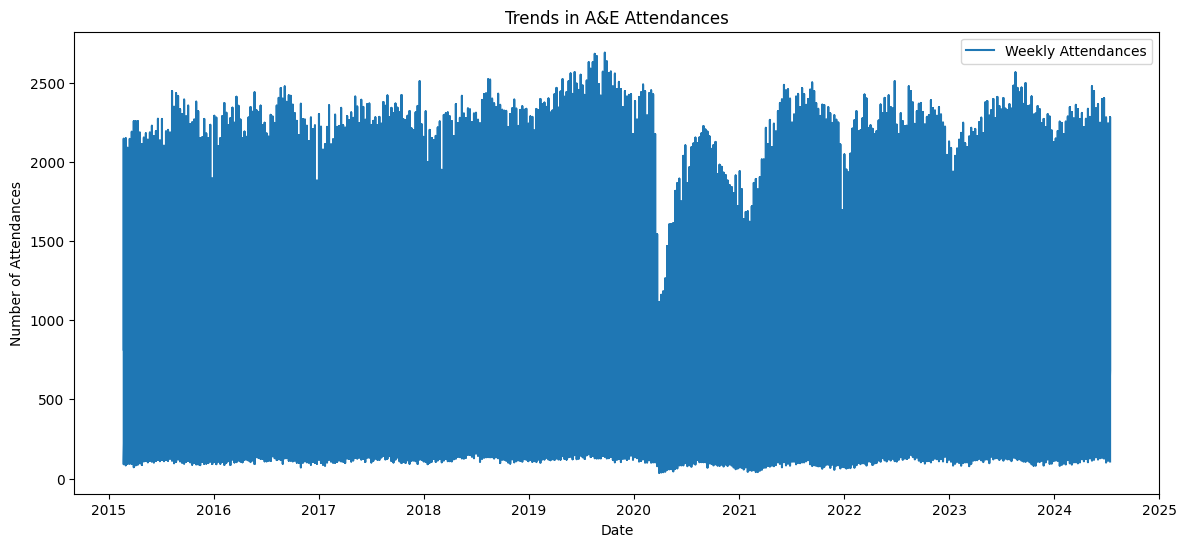

In [7]:
# Plotting trends over time
plt.figure(figsize=(14, 6))
plt.plot(df_week_AE['WeekEndingDate'], df_week_AE['NumberOfAttendancesEpisode'], label='Weekly Attendances')
plt.title('Trends in A&E Attendances')
plt.xlabel('Date')
plt.ylabel('Number of Attendances')
plt.legend()
plt.show()

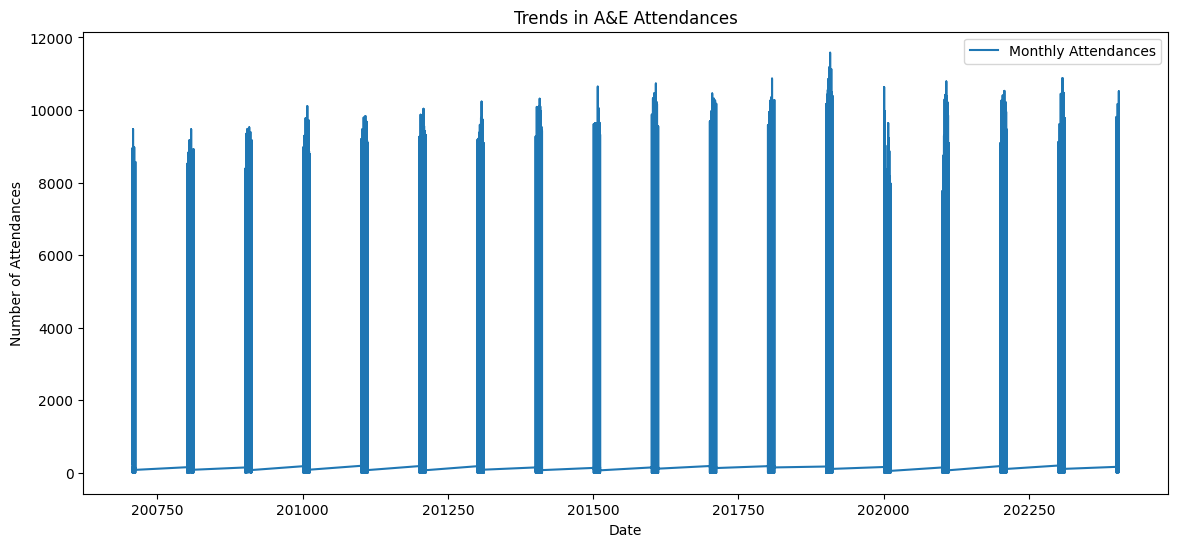

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(df_month_attendances['Month'], df_month_attendances['NumberOfAttendancesAll'], label='Monthly Attendances')
plt.title('Trends in A&E Attendances')
plt.xlabel('Date')
plt.ylabel('Number of Attendances')
plt.legend()
plt.show()

#### Animating demand over time

In [9]:

# Convert WeekEndingDate to datetime format
df_week_AE['WeekEndingDate'] = pd.to_datetime(df_week_AE['WeekEndingDate'], format='%Y%m%d')
#The pd.to_datetime function converts the WeekEndingDate column from a string or integer format (YYYYMMDD) to a pandas datetime object.

# Extract Year and Month
df_week_AE['Year'] = df_week_AE['WeekEndingDate'].dt.year
df_week_AE['Month'] = df_week_AE['WeekEndingDate'].dt.month
df_week_AE['Day'] = df_week_AE['WeekEndingDate'].dt.day

# Display the updated DataFrame
df_week_AE.head()

,WeekEndingDate,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesEpisode,NumberWithin4HoursEpisode,NumberOver4HoursEpisode,PercentageWithin4HoursEpisode,NumberOver8HoursEpisode,PercentageOver8HoursEpisode,NumberOver12HoursEpisode,PercentageOver12HoursEpisode,Year,Month,Day
0,2015-02-22,S92000003,S08000015,A210H,Emergency Department,814,624,190,76.7,21,2.6,2,0.2,2015,2,22
1,2015-02-22,S92000003,S08000015,A111H,Emergency Department,1347,1115,232,82.8,31,2.3,2,0.1,2015,2,22
2,2015-02-22,S92000003,S08000016,B120H,Emergency Department,517,463,54,89.6,1,0.2,0,0.0,2015,2,22
3,2015-02-22,S92000003,S08000017,Y146H,Emergency Department,604,578,26,95.7,0,0.0,0,0.0,2015,2,22
4,2015-02-22,S92000003,S08000017,Y144H,Emergency Department,196,185,11,94.4,1,0.5,0,0.0,2015,2,22


In [10]:
# Sort the DataFrame by Date
df1 = df_week_AE.sort_values(by='WeekEndingDate')
df1.head()

df2= df1[['WeekEndingDate','NumberOfAttendancesEpisode']]

#display the updated dataframe
df2.head()

,WeekEndingDate,NumberOfAttendancesEpisode
0,2015-02-22,814
31,2015-02-22,113
30,2015-02-22,441
29,2015-02-22,895
28,2015-02-22,146


/tmp/ipykernel_55816/2465033954.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  line, = ax.plot_date(df2['WeekEndingDate'], df2['NumberOfAttendancesEpisode'])


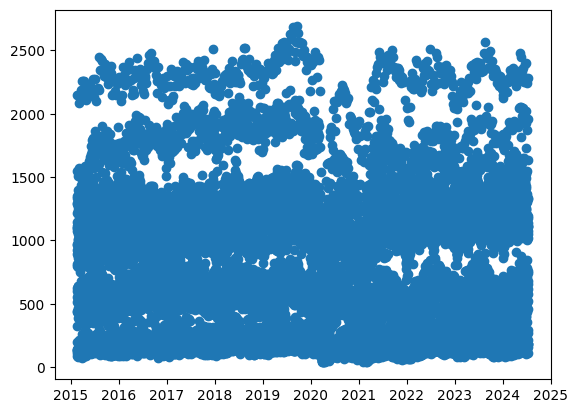

In [11]:
fig, ax= plt.subplots()
line, = ax.plot_date(df2['WeekEndingDate'], df2['NumberOfAttendancesEpisode'])


def animate(i):
    line.set_data(df2['WeekEndingDate'][:i],df2['NumberOfAttendancesEpisode'][:i])
    ax.relim()
    ax.autoscale_view()
    return line,

In [12]:
# Increase the embed limit
mpl.rcParams['animation.embed_limit'] = 100  # This sets the limit to 50 MB
ani= animation.FuncAnimation(fig,animate,frames=2000, interval=1,blit=True)
HTML(ani.to_jshtml())
ani.save('animation.gif')  # Save as mp4 or gif

MovieWriter ffmpeg unavailable; using Pillow instead.


### Interpreting demand with location 

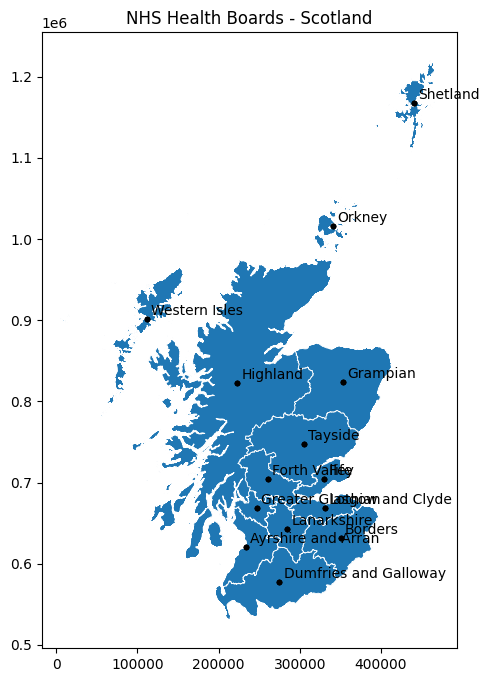

In [13]:
shapefile_path = "SG_NHS_HealthBoards_2019"

#Reading the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

#Plotting the map
#gdf.plot()

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(linewidth=0.6, ax=ax, legend=True, edgecolor='white', legend_kwds={'label': "Patients"})

plt.title("NHS Health Boards - Scotland")

for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['HBName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10)
    # Draw lines
    ax.plot([x, x], [y, y], color='black', marker='o', markersize=3)
    ax.plot([x, x + 0.02], [y, y + 0.02], color='black', marker='o', markersize=3)

#ax.set_title('Total Patients for each board')

plt.show()

In [14]:
gdf
HBnames= gdf[['HBCode','HBName']]
HBnames
gdf.head()

,HBCode,HBName,Shape_Leng,Shape_Area,geometry
0,S08000015,Ayrshire and Arran,679782.304484,3.408802e+09,"MULTIPOLYGON (((201916.2 600444.404, 201918.40..."
1,S08000016,Borders,525406.707597,4.742685e+09,"POLYGON ((345325.903 579663.303, 345325.104 57..."
2,S08000017,Dumfries and Galloway,830301.195667,6.676315e+09,"MULTIPOLYGON (((266004.4 543544.601, 266010.89..."
3,S08000019,Forth Valley,430568.335921,2.733659e+09,"POLYGON ((256533.002 740502.003, 256501.497 74..."
4,S08000020,Grampian,802844.271310,8.800885e+09,"MULTIPOLYGON (((383521.198 771234.696, 383524...."


In [15]:
group_week= df_month_AE.groupby(['HBT','Week','Day']).agg({'NumberOfAttendances': 'sum'}).reset_index()
group_week= group_week.merge(HBnames, left_on= 'HBT', right_on='HBCode')
group_week

,HBT,Week,Day,NumberOfAttendances,HBCode,HBName
0,S08000015,Weekday,Friday,84620,S08000015,Ayrshire and Arran
1,S08000015,Weekday,Monday,98291,S08000015,Ayrshire and Arran
2,S08000015,Weekday,Thursday,85792,S08000015,Ayrshire and Arran
3,S08000015,Weekday,Tuesday,89534,S08000015,Ayrshire and Arran
4,S08000015,Weekday,Wednesday,86783,S08000015,Ayrshire and Arran
...,...,...,...,...,...,...
93,S08000032,Weekday,Thursday,184995,S08000032,Lanarkshire
94,S08000032,Weekday,Tuesday,194038,S08000032,Lanarkshire
95,S08000032,Weekday,Wednesday,187966,S08000032,Lanarkshire
96,S08000032,Weekend,Saturday,151011,S08000032,Lanarkshire


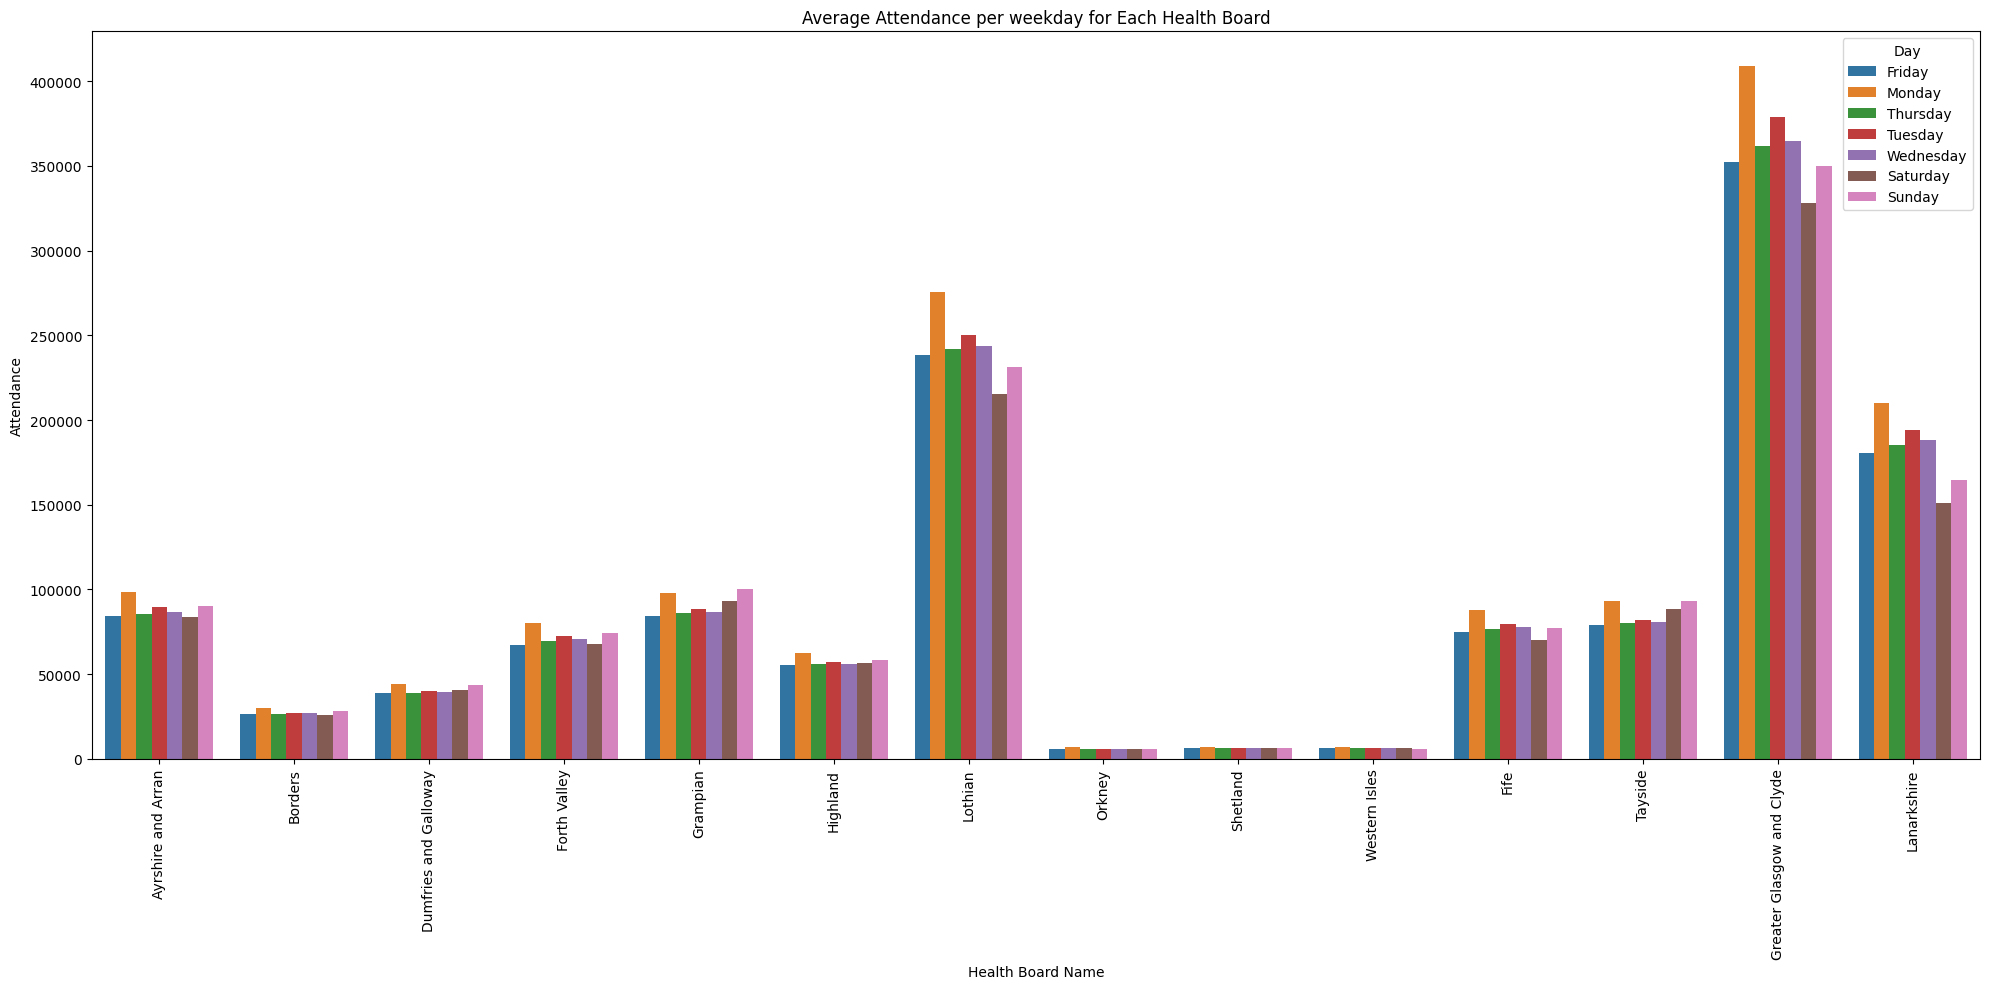

In [16]:
plt.figure(figsize=(20, 10))
sns.barplot(group_week, x= 'HBName', y='NumberOfAttendances', hue='Day')
plt.xlabel('Health Board Name')
plt.ylabel('Attendance')
plt.title('Average Attendance per weekday for Each Health Board')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()

plt.show()

In [18]:
# Group by 'HBT' and 'InOut' and sum 'NumberOfAttendances'
grouped_df = df_month_AE.groupby(['HBT', 'InOut']).agg({'NumberOfAttendances': 'sum'}).reset_index()

# Display the grouped DataFrame
grouped_df

# Pivot the DataFrame to have 'InOut' values as columns
pivot_df = grouped_df.pivot(index='HBT', columns='InOut', values='NumberOfAttendances').reset_index()

# Rename columns for better clarity
pivot_df.columns.name = None  # Remove the name of the columns index
pivot_df = pivot_df.rename(columns={
    'Out of Hours': 'OutOfHours',
    'In Hours': 'InHours'
})

#pivot_df
#grouped_df

grouped_df= grouped_df.merge(HBnames,right_on='HBCode', left_on='HBT')

grouped_df

,HBT,InOut,NumberOfAttendances,HBCode,HBName
0,S08000015,In Hours,269129,S08000015,Ayrshire and Arran
1,S08000015,Out of Hours,349713,S08000015,Ayrshire and Arran
2,S08000016,In Hours,87041,S08000016,Borders
3,S08000016,Out of Hours,104270,S08000016,Borders
4,S08000017,In Hours,124567,S08000017,Dumfries and Galloway
5,S08000017,Out of Hours,160803,S08000017,Dumfries and Galloway
6,S08000019,In Hours,223956,S08000019,Forth Valley
7,S08000019,Out of Hours,277570,S08000019,Forth Valley
8,S08000020,In Hours,252585,S08000020,Grampian
9,S08000020,Out of Hours,384863,S08000020,Grampian


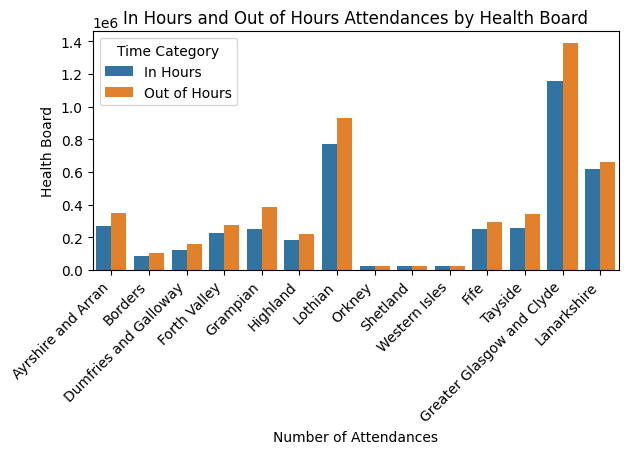

In [20]:
sns.barplot(data= grouped_df, x= 'HBName',y='NumberOfAttendances', hue= 'InOut')

# Customize the plot
plt.xlabel('Number of Attendances')
plt.ylabel('Health Board')
plt.title('In Hours and Out of Hours Attendances by Health Board')
plt.legend(title='Time Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right

# Show the plot
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

In [ ]:
url_group = 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/c4622324-f59c-4011-a67b-83b59c59ca94/download/opendata_monthly_ae_discharge_202404.csv'
df_discharge = pd.read_csv(url_group)
df_discharge.head()
#df_discharge : This data resource contains monthly statistics on new and unplanned return attendances at Accident and Emergency (A&E) services across Scotland by discharge destination and age group.

,Month,Country,HBT,TreatmentLocation,DepartmentType,Age,AgeQF,Discharge,DischargeQF,NumberOfAttendances
0,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,Admission to same Hospital,NaN,85
1,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,Discharged Home or to usual Place of Residence,NaN,386
2,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,Transferred to Other Hospital/Service,NaN,5
3,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,NaN,:,18
4,201801,S92000003,S08000015,A111H,Emergency Department,25-39,NaN,Admission to same Hospital,NaN,206


In [17]:
# Replace NaN values in the 'Discharge' column with 'Unknown' for clarity
df_discharge['Discharge'].fillna('Unknown', inplace=True)

# Group by Health Board (HBT) and Discharge, then sum the attendances
grouped = df_discharge.groupby(['HBT', 'Discharge'])['NumberOfAttendances'].sum().reset_index()

grouped

/tmp/ipykernel_55816/211921645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_discharge['Discharge'].fillna('Unknown', inplace=True)


,HBT,Discharge,NumberOfAttendances
0,S08000015,Admission to same Hospital,180648
1,S08000015,Discharged Home or to usual Place of Residence,399012
2,S08000015,Other,1009
3,S08000015,Transferred to Other Hospital/Service,9236
4,S08000015,Unknown,28937
...,...,...,...
65,S08000032,Admission to same Hospital,396903
66,S08000032,Discharged Home or to usual Place of Residence,847848
67,S08000032,Other,1553
68,S08000032,Transferred to Other Hospital/Service,18826


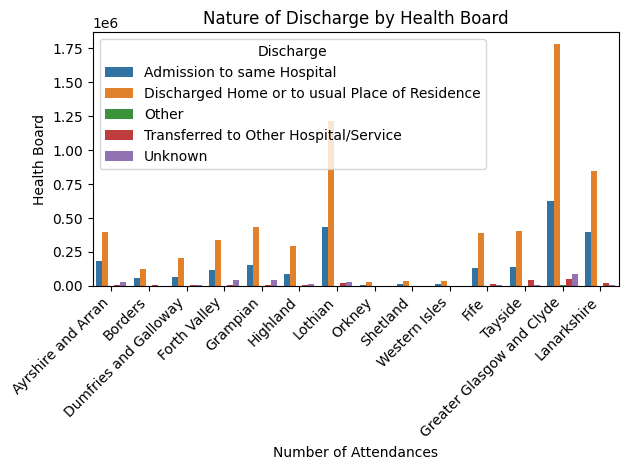

In [19]:
grouped= grouped.merge(HBnames, left_on='HBT', right_on='HBCode')
#grouped.head()

sns.barplot(data= grouped, x= 'HBName',y='NumberOfAttendances', hue= 'Discharge')

# Customize the plot
plt.xlabel('Number of Attendances')
plt.ylabel('Health Board')
plt.title('Nature of Discharge by Health Board')
plt.legend(title='Discharge')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right

# Show the plot
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()



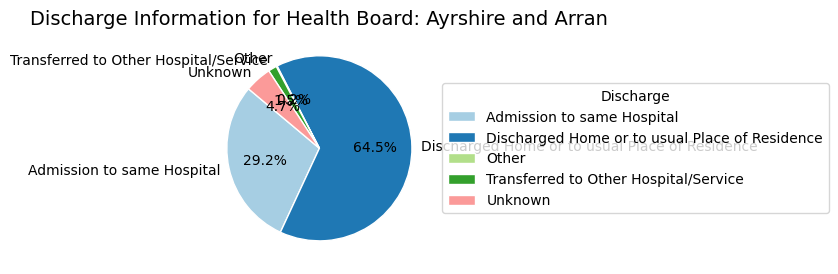

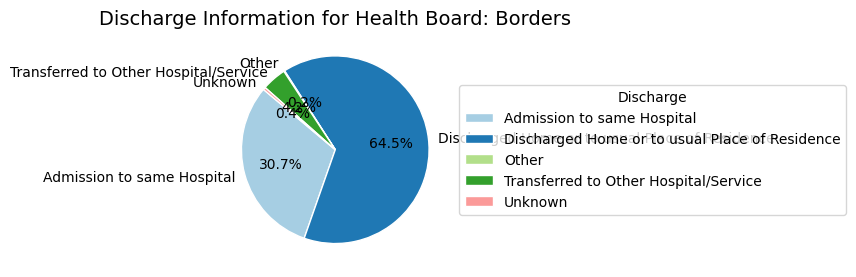

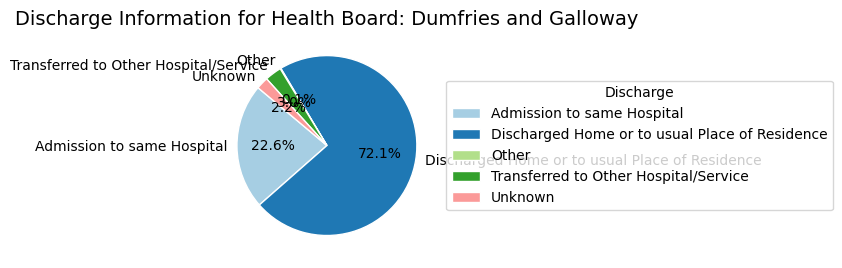

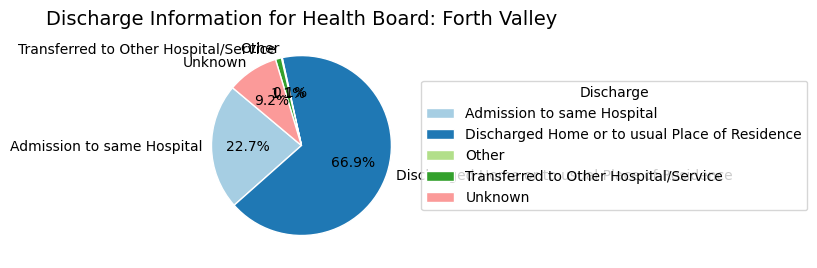

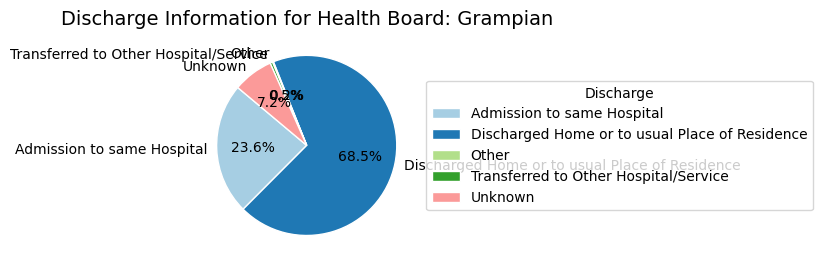

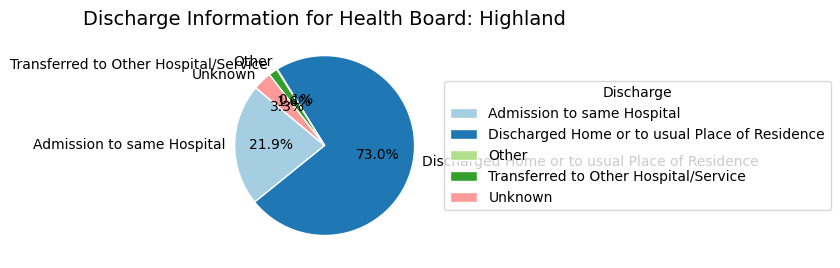

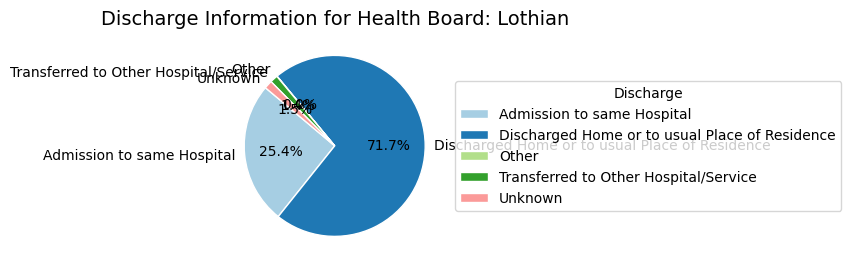

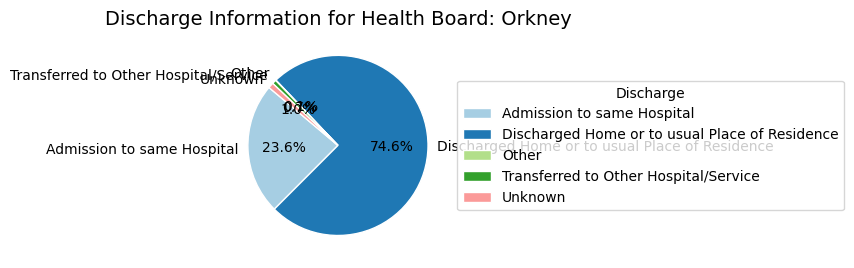

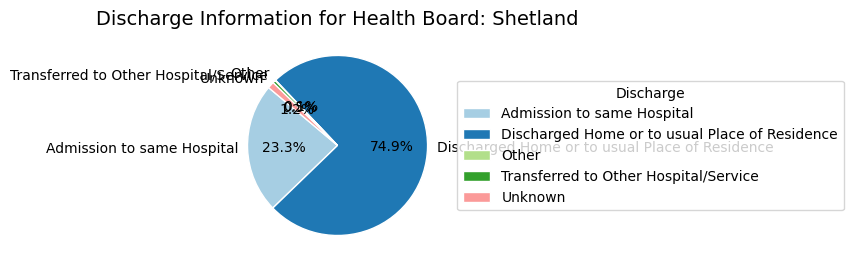

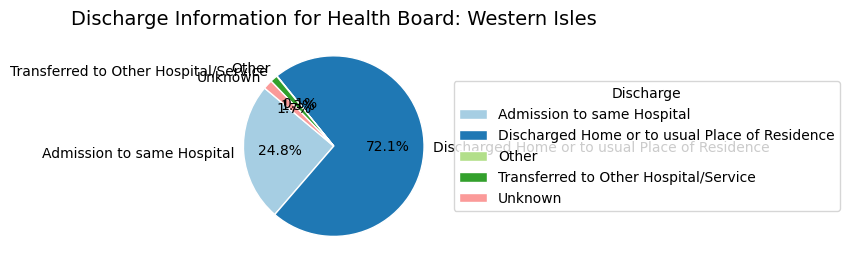

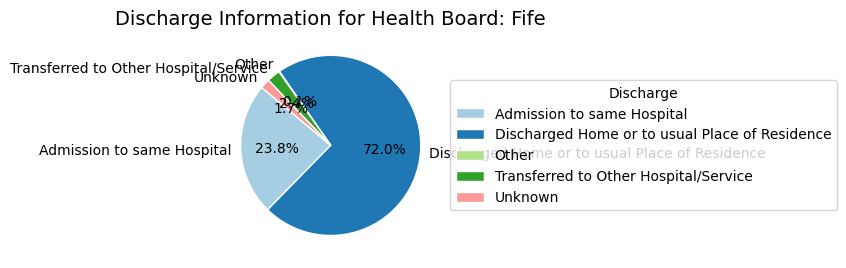

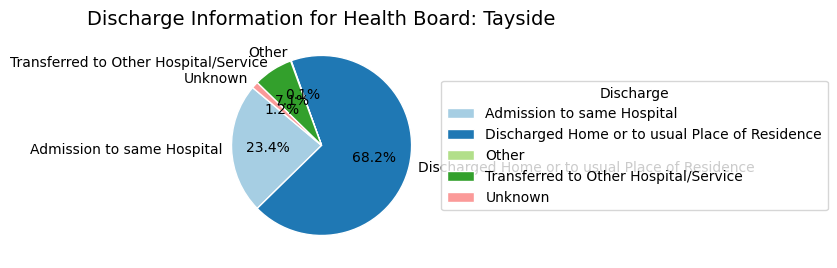

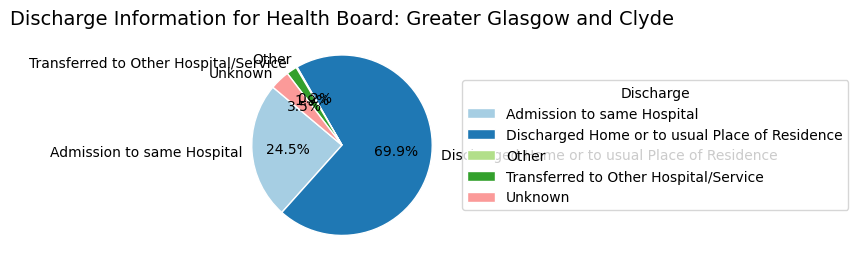

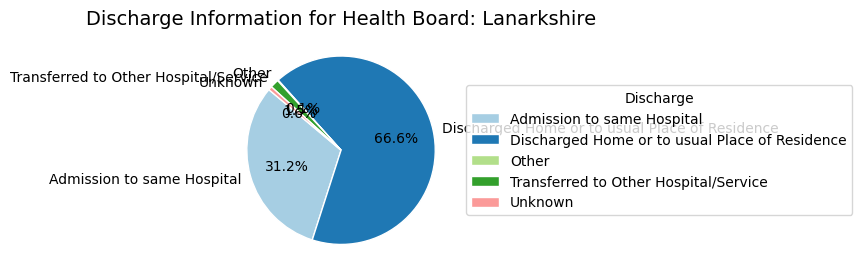

In [21]:
health_boards = grouped['HBT'].unique()

for hb in health_boards:
    hb_data = grouped[grouped['HBT'] == hb]
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        hb_data['NumberOfAttendances'], 
        labels=hb_data['Discharge'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    
    # Adjust text properties
    for text in texts + autotexts:
        text.set_fontsize(10)
    
    plt.title(f'Discharge Information for Health Board: {hb_data["HBName"].values[0]}', fontsize=14)
    plt.legend(wedges, hb_data['Discharge'], title="Discharge", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.tight_layout()
    plt.show()


In [22]:

# Convert WeekEndingDate to datetime format
df_week_AE['WeekEndingDate'] = pd.to_datetime(df_week_AE['WeekEndingDate'], format='%Y%m%d')
#The pd.to_datetime function converts the WeekEndingDate column from a string or integer format (YYYYMMDD) to a pandas datetime object.

# Extract Year and Month
df_week_AE['Year'] = df_week_AE['WeekEndingDate'].dt.year
df_week_AE['Month'] = df_week_AE['WeekEndingDate'].dt.month
df_week_AE['Day'] = df_week_AE['WeekEndingDate'].dt.day

# Display the updated DataFrame
df_week_AE.head()

,WeekEndingDate,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesEpisode,NumberWithin4HoursEpisode,NumberOver4HoursEpisode,PercentageWithin4HoursEpisode,NumberOver8HoursEpisode,PercentageOver8HoursEpisode,NumberOver12HoursEpisode,PercentageOver12HoursEpisode,Year,Month,Day
0,2015-02-22,S92000003,S08000015,A210H,Emergency Department,814,624,190,76.7,21,2.6,2,0.2,2015,2,22
1,2015-02-22,S92000003,S08000015,A111H,Emergency Department,1347,1115,232,82.8,31,2.3,2,0.1,2015,2,22
2,2015-02-22,S92000003,S08000016,B120H,Emergency Department,517,463,54,89.6,1,0.2,0,0.0,2015,2,22
3,2015-02-22,S92000003,S08000017,Y146H,Emergency Department,604,578,26,95.7,0,0.0,0,0.0,2015,2,22
4,2015-02-22,S92000003,S08000017,Y144H,Emergency Department,196,185,11,94.4,1,0.5,0,0.0,2015,2,22


In [25]:
url_hospital = 'https://www.opendata.nhs.scot/dataset/cbd1802e-0e04-4282-88eb-d7bdcfb120f0/resource/c698f450-eeed-41a0-88f7-c1e40a568acc/download/hospitals.csv'
df_hospital = pd.read_csv(url_hospital)
df_hospital.head()
#df_hospital : A list of all NHS hospitals across Scotland and associated geographic information. It should be noted that this list contains all hospitals in Scotland, not only acute hospitals.

,HospitalCode,HospitalName,AddressLine1,AddressLine2,AddressLine2QF,AddressLine3,AddressLine3QF,AddressLine4,AddressLine4QF,Postcode,HealthBoard,HSCP,CouncilArea,IntermediateZone,DataZone
0,A101H,Arran War Memorial Hospital,Lamlash,Isle of Arran,NaN,NaN,z,NaN,z,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176
1,A103H,Ayrshire Central Hospital,Kilwinning Road,Irvine,NaN,NaN,z,NaN,z,KA128SS,S08000015,S37000020,S12000021,S02002105,S01011213
2,A105H,Kirklandside Hospital,Kirklandside,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA1 5LH,S08000015,S37000008,S12000008,S02001492,S01007961
3,A110H,Lady Margaret Hospital,College St,Millport,NaN,Isle of Cumbrae,NaN,NaN,z,KA280HF,S08000015,S37000020,S12000021,S02002128,S01011328
4,A111H,University Hospital Crosshouse,Kilmarnock Road,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA2 0BE,S08000015,S37000008,S12000008,S02001504,S01008027


In [26]:
hospital_counts = df_hospital.groupby('HealthBoard').size().reset_index(name='NumberOfHospitals')
hospital_counts

,HealthBoard,NumberOfHospitals
0,S08000015,17
1,S08000016,15
2,S08000017,21
3,S08000019,8
4,S08000020,35
5,S08000022,32
6,S08000024,33
7,S08000025,1
8,S08000026,1
9,S08000028,3


In [27]:
df_month= df_month_AE[['HBT', 'NumberOfAttendances']]
df_month.head()

# Group by 'HBCode' and sum 'NumberOfAttendances'
df_month_agg = df_month.groupby('HBT', as_index=False).agg({'NumberOfAttendances': 'sum'})
df_month_agg= df_month_agg.merge(hospital_counts,right_on='HealthBoard', left_on='HBT')
df_month_agg= df_month_agg[['HBT','NumberOfAttendances','NumberOfHospitals']]
df_month_agg= df_month_agg.merge(pivot_df, left_on='HBT',right_on='HBT')

gdf_month_AE = gdf.merge(df_month_agg, left_on='HBCode', right_on='HBT')
gdf_month_AE= gdf_month_AE[['HBCode','HBName','Shape_Leng','Shape_Area','geometry','NumberOfAttendances','NumberOfHospitals','InHours',	'OutOfHours']]

gdf_month_AE

,HBCode,HBName,Shape_Leng,Shape_Area,geometry,NumberOfAttendances,NumberOfHospitals,InHours,OutOfHours
0,S08000015,Ayrshire and Arran,6.797823e+05,3.408802e+09,"MULTIPOLYGON (((201916.2 600444.404, 201918.40...",618842,17,269129,349713
1,S08000016,Borders,5.254067e+05,4.742685e+09,"POLYGON ((345325.903 579663.303, 345325.104 57...",191311,15,87041,104270
2,S08000017,Dumfries and Galloway,8.303012e+05,6.676315e+09,"MULTIPOLYGON (((266004.4 543544.601, 266010.89...",285370,21,124567,160803
3,S08000019,Forth Valley,4.305683e+05,2.733659e+09,"POLYGON ((256533.002 740502.003, 256501.497 74...",501526,8,223956,277570
4,S08000020,Grampian,8.028443e+05,8.800885e+09,"MULTIPOLYGON (((383521.198 771234.696, 383524....",637448,35,252585,384863
5,S08000022,Highland,8.486538e+06,3.363704e+10,"MULTIPOLYGON (((173254.001 604986.004, 173258....",402323,32,182128,220195
6,S08000024,Lothian,3.789231e+05,1.760804e+09,"MULTIPOLYGON (((313586.104 679560.597, 313614....",1696796,33,769121,927675
7,S08000025,Orkney,1.589228e+06,1.086211e+09,"MULTIPOLYGON (((347378.503 976721.996, 347387....",41484,1,20616,20868
8,S08000026,Shetland,2.211514e+06,1.656618e+09,"MULTIPOLYGON (((419927.604 1069152.398, 419927...",46511,1,22062,24449
9,S08000028,Western Isles,3.723205e+06,3.268473e+09,"MULTIPOLYGON (((55528.504 780719.001, 55556.50...",44872,3,21436,23436


In [29]:
df_month_agg1= gdf_month_AE[['HBName','HBCode','NumberOfAttendances', 'NumberOfHospitals', 'InHours','OutOfHours']]
df_month_agg1

,HBName,HBCode,NumberOfAttendances,NumberOfHospitals,InHours,OutOfHours
0,Ayrshire and Arran,S08000015,618842,17,269129,349713
1,Borders,S08000016,191311,15,87041,104270
2,Dumfries and Galloway,S08000017,285370,21,124567,160803
3,Forth Valley,S08000019,501526,8,223956,277570
4,Grampian,S08000020,637448,35,252585,384863
5,Highland,S08000022,402323,32,182128,220195
6,Lothian,S08000024,1696796,33,769121,927675
7,Orkney,S08000025,41484,1,20616,20868
8,Shetland,S08000026,46511,1,22062,24449
9,Western Isles,S08000028,44872,3,21436,23436


In [30]:
df_month_agg1['Attendance per hospital']= round(df_month_agg1['NumberOfAttendances']/df_month_agg1['NumberOfHospitals'],3)
df_month_agg1

/tmp/ipykernel_55816/3972975516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_agg1['Attendance per hospital']= round(df_month_agg1['NumberOfAttendances']/df_month_agg1['NumberOfHospitals'],3)


,HBName,HBCode,NumberOfAttendances,NumberOfHospitals,InHours,OutOfHours,Attendance per hospital
0,Ayrshire and Arran,S08000015,618842,17,269129,349713,36402.471
1,Borders,S08000016,191311,15,87041,104270,12754.067
2,Dumfries and Galloway,S08000017,285370,21,124567,160803,13589.048
3,Forth Valley,S08000019,501526,8,223956,277570,62690.750
4,Grampian,S08000020,637448,35,252585,384863,18212.800
5,Highland,S08000022,402323,32,182128,220195,12572.594
6,Lothian,S08000024,1696796,33,769121,927675,51418.061
7,Orkney,S08000025,41484,1,20616,20868,41484.000
8,Shetland,S08000026,46511,1,22062,24449,46511.000
9,Western Isles,S08000028,44872,3,21436,23436,14957.333


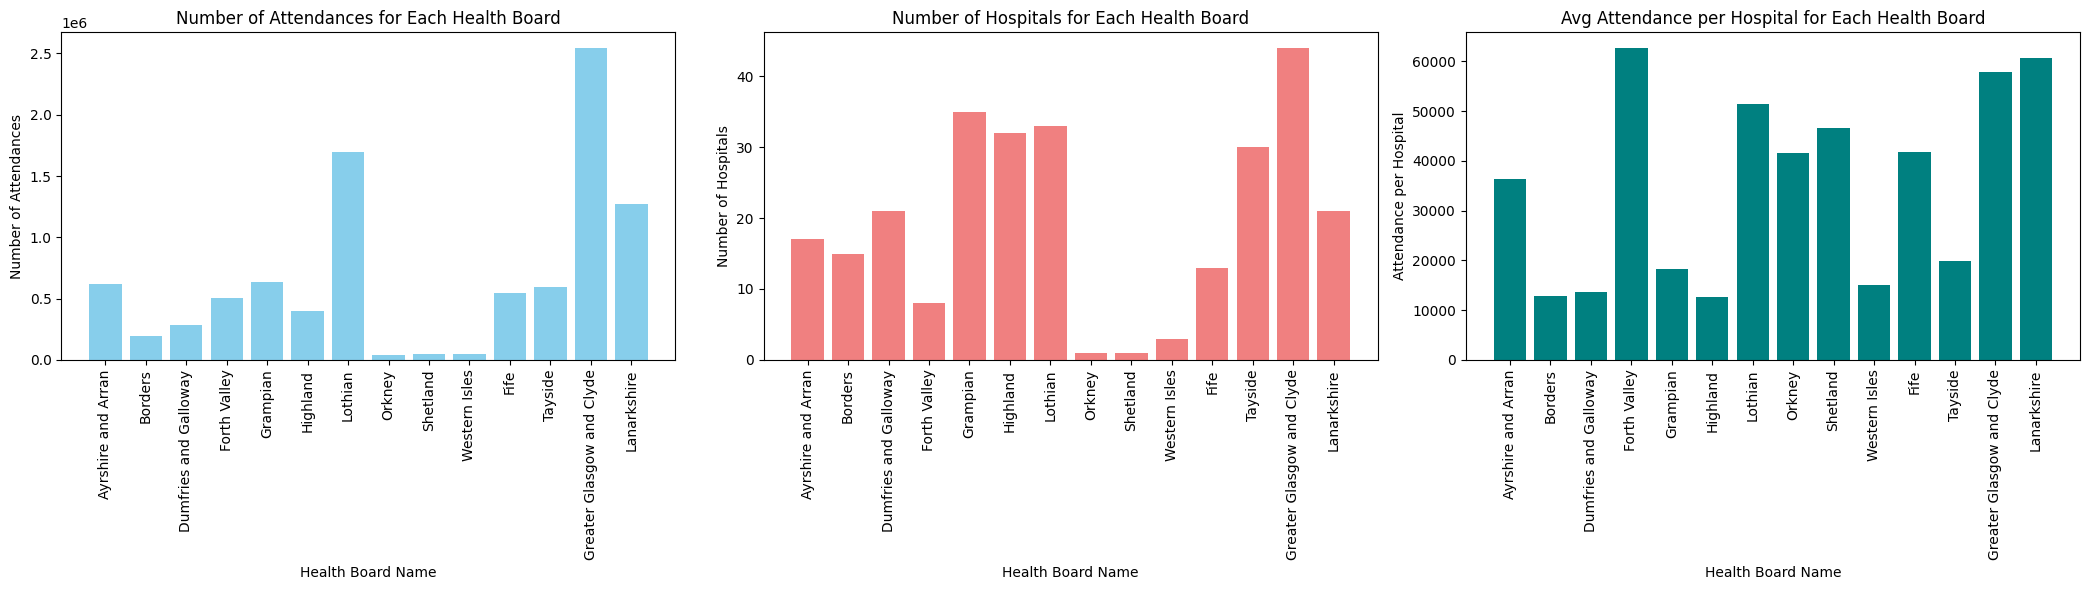

In [31]:

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

# First plot: Number of Attendances
axes[0].bar(df_month_agg1['HBName'], df_month_agg1['NumberOfAttendances'], color='skyblue')
axes[0].set_xlabel('Health Board Name')
axes[0].set_ylabel('Number of Attendances')
axes[0].set_title('Number of Attendances for Each Health Board')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# Second plot: Number of Hospitals
axes[1].bar(df_month_agg1['HBName'], df_month_agg1['NumberOfHospitals'], color='lightcoral')
axes[1].set_xlabel('Health Board Name')
axes[1].set_ylabel('Number of Hospitals')
axes[1].set_title('Number of Hospitals for Each Health Board')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

axes[2].bar(df_month_agg1['HBName'], df_month_agg1['Attendance per hospital'], color='teal')
axes[2].set_xlabel('Health Board Name')
axes[2].set_ylabel('Attendance per Hospital')
axes[2].set_title('Avg Attendance per Hospital for Each Health Board')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


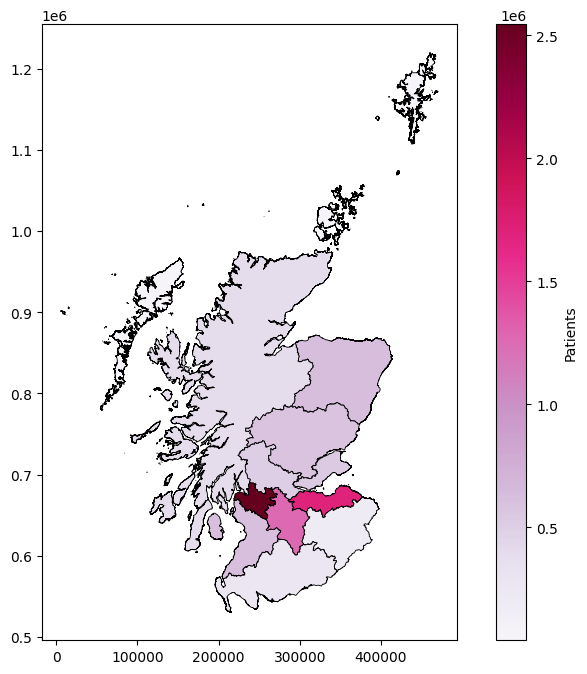

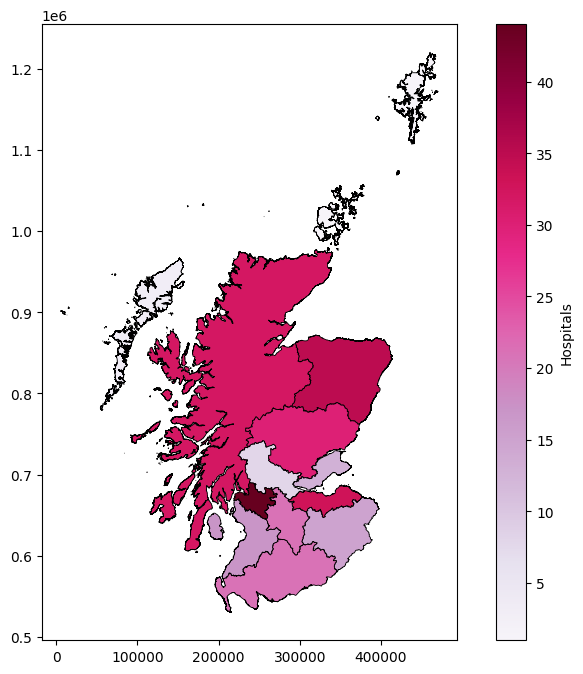

: 

In [32]:
# Plot the GeoDataFrame with a colormap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_month_AE.plot(column='NumberOfAttendances', cmap='PuRd', linewidth=0.6, ax=ax, legend=True, edgecolor='black', legend_kwds={'label': "Patients"})

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_month_AE.plot(column='NumberOfHospitals', cmap='PuRd', linewidth=0.6, ax=ax, legend=True, edgecolor='black', legend_kwds={'label': "Hospitals"})

plt.show()